# Gradient Descent : Weight Height Scenario

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv').head(100)

**Preparaing the data**

In [3]:
df['Weight'] = round(df['Weight']/2.2)
df['Height'] = round((df['Height']*2.54)/100,2)
df.head(3)

,Gender,Height,Weight
0,Male,1.88,110.0
1,Male,1.75,74.0
2,Male,1.88,97.0


In [4]:
X = df[['Weight']]
y = df[['Height']]

In [5]:
X

,Weight
0,110.0
1,74.0
2,97.0
3,100.0
4,94.0
...,...
95,75.0
96,88.0
97,82.0
98,79.0


In [6]:
n_rows = df.shape[0]

In [7]:
X = X.to_numpy().reshape(n_rows,1)

In [8]:
X[:5]

array([[110.],
       [ 74.],
       [ 97.],
       [100.],
       [ 94.]])

In [9]:
ones = np.ones((n_rows,1))
ones[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

**Rewriting X in terms $n x 2$ matrix**

In [10]:
X = np.concatenate((ones,X),axis=1)
X[:5]

array([[  1., 110.],
       [  1.,  74.],
       [  1.,  97.],
       [  1., 100.],
       [  1.,  94.]])

In [11]:
y=y.to_numpy().reshape(n_rows,1)
y[:5]

array([[1.88],
       [1.75],
       [1.88],
       [1.82],
       [1.77]])

In [12]:
X.shape, y.shape

((100, 2), (100, 1))

### Plotting Data

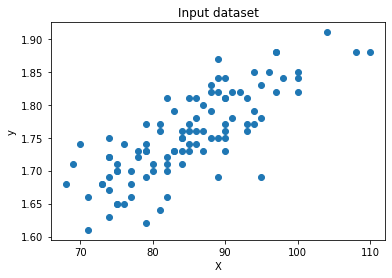

In [13]:
plt.scatter(x=df['Weight'], y=df['Height'])
plt.xlabel('X'); plt.ylabel('y');
plt.title('Input dataset');



### Cost Function

$J(θ_0​,θ_1​)=\frac{1}{2m}​\sum\limits_{i=1}^{m}(\hat{y}_{i} - y_{i})^2 = \frac{1}{2m}​\sum\limits_{i=1}^{m}(h_{\theta}(x_i) - y_{i})^2$

knowing that the general rule  for $h_\theta(x)$ gives :  
  
  $h_\theta(x) =  \theta^T X$



In [14]:
# So in Python
Theta = np.array([[0],[0]])
Theta

array([[0],
       [0]])

In [15]:
def compute_cost(X, y, theta=np.array([[0],[0]])):
    """Given covariate matrix X, the prediction results y and coefficients theta
    compute the loss"""
    
    m = len(y)
    J=0 # initialize loss to zero
    
    # reshape theta
    #theta=theta.reshape(2,1)
    
    # calculate the hypothesis - y_hat
    h_x = np.dot(X,theta)
    #print(h_x)
    
    # subtract y from y_hat, square and sum
    error_term = sum((h_x - y)**2)
    print(error_term)
    
    # divide by twice the number of samples - standard practice.
    loss = error_term/(2*m)
    
    return loss

In [16]:
theta=np.array([[0],[0]])
theta=theta.reshape(2,1)
theta

array([[0],
       [0]])

In [36]:
np.dot(X,theta)[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
compute_cost(X,y)

[308.0128]


array([1.540064])

### Use Gradient Descent

Repeat the operations until convergence : 

$\theta_{0} := \theta_{0} - \alpha \frac{1}{m} \sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(0)}_{i}]$

$\theta_{1} := \theta_{1} - \alpha \frac{1}{m} \sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(1)}_{i}]$

**Translating  to python**

* $\alpha$ : constant defined

* $m$ : size of the set

In [27]:
m = len(y)

* $(h_{\theta}(x_{i}) - y_{i})$ : error

In [28]:
error = (np.dot(X,theta) - y)

In [29]:
error[:5]

array([[-1.88],
       [-1.75],
       [-1.88],
       [-1.82],
       [-1.77]])

* $\sum_{i=1}^{m} [(h_{\theta}(x_{i}) - y_{i})x^{(1)}_{i}]$

In [35]:
X

array([[  1., 110.],
       [  1.,  74.],
       [  1.,  97.],
       [  1., 100.],
       [  1.,  94.],
       [  1.,  69.],
       [  1.,  84.],
       [  1.,  76.],
       [  1.,  80.],
       [  1.,  71.],
       [  1.,  85.],
       [  1.,  97.],
       [  1.,  76.],
       [  1.,  86.],
       [  1.,  85.],
       [  1.,  78.],
       [  1.,  89.],
       [  1.,  79.],
       [  1.,  85.],
       [  1.,  83.],
       [  1.,  79.],
       [  1.,  90.],
       [  1.,  68.],
       [  1., 104.],
       [  1.,  74.],
       [  1.,  87.],
       [  1.,  84.],
       [  1.,  94.],
       [  1.,  80.],
       [  1.,  70.],
       [  1.,  85.],
       [  1.,  97.],
       [  1.,  89.],
       [  1.,  93.],
       [  1.,  93.],
       [  1.,  88.],
       [  1.,  90.],
       [  1.,  84.],
       [  1.,  74.],
       [  1.,  74.],
       [  1.,  78.],
       [  1.,  88.],
       [  1.,  77.],
       [  1.,  73.],
       [  1.,  75.],
       [  1.,  86.],
       [  1.,  85.],
       [  1.,

Turn the $x$ into a vector for better multiplication

In [34]:
X[:,0].reshape(m,1)[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])